### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Load Data

In [ ]:
fail_df = pd.read_csv('/content/S3-M02-TRIM_atleast-1_db-fail.tsv', sep = '\t')
fail_df['pass_fail'] = [0]*len(fail_df)
pass_df = pd.read_csv('/content/S3-M02-TRIM_atleast-1_db-pass.tsv', sep = '\t')
pass_df['pass_fail'] = [1]*len(pass_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index                  int64
sequence_id           object
sequence              object
rev_comp              object
productive            object
                      ...   
difference           float64
d_seq_difference     float64
d_germ_difference    float64
j_seq_difference     float64
j_germ_difference    float64
Length: 63, dtype: object

In [ ]:
fail_df.shape

(20956, 53)

In [ ]:
pass_df.shape

(99957, 53)

In [ ]:
df = pass_df.append(fail_df)

# Reset index to avoid funny business
df.reset_index(inplace=True)

<ipython-input-9-c4d5afadcfa6>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = pass_df.append(fail_df)


In [ ]:
df.columns

Index(['index', 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call',
       'd_call', 'j_call', 'sequence_alignment', 'germline_alignment',
       'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar',
       'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length',
       'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end',
       'v_germline_start', 'v_germline_end', 'd_sequence_start',
       'd_sequence_end', 'd_germline_start', 'd_germline_end',
       'j_sequence_start', 'j_sequence_end', 'j_germline_start',
       'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score',
       'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1',
       'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'duplicate_count',
       'cprimer', 'vprimer', 'pass_fail'],
      dtype='object')

In [ ]:
df.shape

(120913, 54)

In [ ]:
df.tail()

,index,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,...,fwr2,fwr3,fwr4,cdr1,cdr2,cdr3,duplicate_count,cprimer,vprimer,pass_fail
120908,20951,M02058:623:000000000-DMLF3:1:1102:13824:28612,CGGCCCGGGAGCGGCCGCTCAGGTGCAGCTCGCGGAGTCTGGAGGA...,T,F,IGHV3S58*01,IGHD2*01,IGHJ7*01,CAGGTGCAGCTCGCGGAGTCTGGAGGA...GGCTTGGTGCAGCCTG...,CAGGTGCAGCTGGTAGAGTCTGGGGGA...GGATTGGTGCAGGCTG...,...,ATGGGCTGGTTCCGCCAGGCTCCAGGGAAGGAGCGTGAGTTTGTCG...,TCATACTCAGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAG...,NaN,GGACGCACCTTC............ACCGGCTATGAC,ATTAGCTGGTAT......AGTACCACGCGT,NaN,1,VHH-VecF1,short_hinge,0
120909,20952,M02058:623:000000000-DMLF3:1:1102:18450:28631,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGTGGAGTCTGGAGGC...,T,T,IGHV3S53*01,IGHD7*01,"IGHJ4*01,IGHJ6*01",CAGTTGCAGCTGGTGGAGTCTGG---A...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,ATGGCATGGTACCGCCAGGCTCCAGGGAAGCAGCGCGAGTTCGTCG...,AAGTATGTAAGCTCCGTGAAG...GGCCGATTCACCATCACCAGAG...,NaN,GGAATCGTCTTC............AGGATCTATGAC,AGTCGTAGCGAT.........GGTGTTACA,NaN,1,VHH-VecF1,short_hinge,0
120910,20953,M02058:623:000000000-DMLF3:1:1102:11762:28646,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTCGCGGAGACTGGGGGG...,T,F,IGHV3S53*01,IGHD7*01,"IGHJ4*01,IGHJ6*01",CAGTTGCAGCTCGCGGAGACTGGGGGA...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,ATGGCATGGTACCGCCAGGCTCCAGGGAAGCAGCGCGAGTTCGTCG...,AACTATGCAAGCTCCGTGAAG...GGCCGATTCACCATTTCCAGAG...,NaN,GGAATCGTCTTC............AGGATCTATGAC,AGTCGTAGCGAT.........GATGAAACA,NaN,1,VHH-VecF1,short_hinge,0
120911,20954,M02058:623:000000000-DMLF3:1:1102:14792:28685,CGGCCCGGGAGCGGCCGCTCAGGTGCAGCTGGTGGAGTCTGGTGGA...,T,T,IGHV3S66*01,IGHD6*01,"IGHJ4*01,IGHJ6*01",.AGGTGCAGCTGGTGGAGTCTGGTGGA...GGCTTGGTGCAGACTG...,GAGGTGCAGCTCGTGGAGTCTGGGGGA...GGCTTGGTGCAGGCTG...,...,GTAGCCTGGTTCCGCCAGGCCCCAGGGAAAGAGCGTGAGGCGGTCT...,CACTATGCCGACTCCGTGAAG...GGCCGATTCACCGTCTCCAGTG...,NaN,GGATTCACTATC............GATGGTTATGCC,ATTAGTACTAGT......GATTATCTTACA,NaN,1,VHH-VecF1,short_hinge,0
120912,20955,M02058:623:000000000-DMLF3:1:1102:18955:28674,CGGCCCGGGAGCGGCCGCTCAGGTGCAGCTGGCGGAGTCAGGGGGA...,T,F,IGHV3S53*01,IGHD5*01,IGHJ7*01,CAGGTGCAGCTGGCGGAGTCAGGGGGA...GGCTTGGTACAGTTTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,ATGGGCTGGTACCGCCAGGCTCCAGGGAAGCAGCGCGAGTTGGTCG...,AACTATGCGGACTCCGTGAAG...GGCCGATTCACCATCTCCAGCG...,NaN,GGAACCATCTTC............AGGGGCAATTTT,ATTACTTACTAT.........GGGACCACG,NaN,1,VHH-VecF1,short_hinge,0


In [ ]:
df.duplicate_count.describe()

count    120913.000000
mean          1.020932
std           0.336732
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          96.000000
Name: duplicate_count, dtype: float64

In [ ]:
df['v_score']

0         244.0
1         316.0
2         304.0
3         313.0
4         360.0
          ...  
120908    338.0
120909    310.0
120910    311.0
120911    299.0
120912    343.0
Name: v_score, Length: 120913, dtype: float64

## Principal Component Analysis



```
# This is formatted as code
```



In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
other_cols = df.select_dtypes(include=['object']).columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cdf = df.select_dtypes(include=['float64', 'int64'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,c_call,junction_length,np1_length,np2_length,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,d_sequence_start,...,v_identity,v_support,d_score,d_identity,d_support,j_score,j_identity,j_support,duplicate_count,pass_fail
0,0,NaN,39.0,22.0,NaN,30,280,1,317,NaN,...,0.81538,1.330000e-67,NaN,NaN,NaN,37.2,0.87097,5.960000e-07,1,1
1,1,NaN,51.0,1.0,34.0,20,307,1,315,309.0,...,0.85069,3.980000e-89,14.1,1.00000,2.300,64.1,1.00000,5.280000e-15,1,1
2,2,NaN,27.0,10.0,4.0,20,299,1,307,310.0,...,0.84643,2.110000e-85,12.2,1.00000,8.300,29.5,0.80556,1.290000e-04,1,1
3,3,NaN,39.0,28.0,NaN,20,313,1,318,NaN,...,0.84694,3.360000e-88,NaN,NaN,NaN,41.1,0.95833,4.550000e-08,1,1
4,4,NaN,33.0,4.0,16.0,20,303,1,311,308.0,...,0.90493,2.800000e-102,12.2,0.88889,8.400,52.6,0.96667,1.490000e-11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120908,20951,NaN,NaN,14.0,5.0,20,307,1,312,322.0,...,0.87500,1.090000e-95,21.8,1.00000,0.011,75.7,0.93750,1.790000e-18,1,0
120909,20952,NaN,NaN,0.0,8.0,20,304,1,315,305.0,...,0.85069,2.730000e-87,14.1,1.00000,2.100,50.7,0.96552,5.420000e-11,1,0
120910,20953,NaN,NaN,0.0,9.0,20,308,1,315,309.0,...,0.85121,9.390000e-88,12.2,1.00000,8.200,50.7,0.96552,5.480000e-11,1,0
120911,20954,NaN,NaN,14.0,34.0,21,307,1,312,322.0,...,0.83275,5.980000e-84,23.8,0.88889,0.003,21.8,0.85000,3.000000e-02,1,0


In [ ]:
cdf = cdf.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(cdf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

In [ ]:
component_num = 10
pca = PCA(n_components=component_num)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#fit to scaled data
pca.fit(scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PCA(n_components=10)

In [ ]:
pca_data = pca.transform(scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pca_df = pd.DataFrame(data = pca_data, columns=[f'PC{i+1}' for i in range(component_num)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pca_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,5.255161,-4.094424,0.144057,0.404212,1.391101,1.401564,1.037499,-0.803034,0.186699,-0.038090
1,-0.511769,0.686841,-0.236215,-0.896069,0.195715,-0.400844,-0.614966,1.124391,-0.171841,-0.213200
2,1.648797,0.724449,-1.130428,1.474901,0.163914,1.737822,-1.167673,-0.145529,0.090045,0.037257
3,3.412161,-4.861426,-0.464323,-0.800457,1.185153,0.635857,-1.187609,-1.343907,-0.104481,0.601369
4,0.363999,-0.176919,-0.906414,-0.041143,-0.817846,0.032660,-1.405242,1.213966,-0.460480,0.027970
...,...,...,...,...,...,...,...,...,...,...
120908,-1.128488,1.061369,-2.112351,-0.154503,-2.270612,0.002630,1.044363,-0.571767,0.415439,-0.229458
120909,1.248121,0.103075,-3.126034,0.017728,-0.480933,0.345429,-0.791783,1.779145,-0.300490,-0.345691
120910,1.163723,0.017927,-3.218802,0.123203,-0.309831,0.075106,-0.898516,1.673820,-0.338350,-0.298876
120911,1.157076,1.764783,-3.682182,-1.494781,0.804688,2.321024,-2.046623,1.038338,-0.593735,0.075672


## Feature Reduction

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
other_cols = df.select_dtypes(include=['object']).columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cdf = df.select_dtypes(include=['float64', 'int64'])
cdf = cdf.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(cdf)
scaled_cdf = pd.DataFrame(scaled, columns = cdf.columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

In [ ]:
cdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,c_call,junction_length,np1_length,np2_length,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,d_sequence_start,...,v_identity,v_support,d_score,d_identity,d_support,j_score,j_identity,j_support,duplicate_count,pass_fail
0,0,0.0,39.0,22.0,0.0,30,280,1,317,0.0,...,0.81538,1.330000e-67,0.0,0.00000,0.000,37.2,0.87097,5.960000e-07,1,1
1,1,0.0,51.0,1.0,34.0,20,307,1,315,309.0,...,0.85069,3.980000e-89,14.1,1.00000,2.300,64.1,1.00000,5.280000e-15,1,1
2,2,0.0,27.0,10.0,4.0,20,299,1,307,310.0,...,0.84643,2.110000e-85,12.2,1.00000,8.300,29.5,0.80556,1.290000e-04,1,1
3,3,0.0,39.0,28.0,0.0,20,313,1,318,0.0,...,0.84694,3.360000e-88,0.0,0.00000,0.000,41.1,0.95833,4.550000e-08,1,1
4,4,0.0,33.0,4.0,16.0,20,303,1,311,308.0,...,0.90493,2.800000e-102,12.2,0.88889,8.400,52.6,0.96667,1.490000e-11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120908,20951,0.0,0.0,14.0,5.0,20,307,1,312,322.0,...,0.87500,1.090000e-95,21.8,1.00000,0.011,75.7,0.93750,1.790000e-18,1,0
120909,20952,0.0,0.0,0.0,8.0,20,304,1,315,305.0,...,0.85069,2.730000e-87,14.1,1.00000,2.100,50.7,0.96552,5.420000e-11,1,0
120910,20953,0.0,0.0,0.0,9.0,20,308,1,315,309.0,...,0.85121,9.390000e-88,12.2,1.00000,8.200,50.7,0.96552,5.480000e-11,1,0
120911,20954,0.0,0.0,14.0,34.0,21,307,1,312,322.0,...,0.83275,5.980000e-84,23.8,0.88889,0.003,21.8,0.85000,3.000000e-02,1,0


In [ ]:
scaled_cdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,c_call,junction_length,np1_length,np2_length,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,d_sequence_start,...,v_identity,v_support,d_score,d_identity,d_support,j_score,j_identity,j_support,duplicate_count,pass_fail
0,-1.423406,0.0,-0.008135,0.625472,-0.852131,1.625133,-0.824668,0.0,0.195352,-2.862180,...,-0.867484,-0.005557,-2.162228,-2.949421,-0.792774,-2.210058,-1.187580,-0.066812,-0.062164,0.457876
1,-1.423373,0.0,0.523574,-1.311448,1.463308,-0.333409,0.168920,0.0,0.120476,0.230270,...,-0.118251,-0.005557,0.251313,0.404835,-0.611040,-0.041531,0.568351,-0.066817,-0.062164,0.457876
2,-1.423340,0.0,-0.539844,-0.481339,-0.579726,-0.333409,-0.125476,0.0,-0.179029,0.240278,...,-0.208643,-0.005557,-0.073916,0.404835,-0.136952,-2.830789,-2.077725,-0.065896,-0.062164,0.457876
3,-1.423307,0.0,-0.008135,1.178878,-0.852131,-0.333409,0.389717,0.0,0.232791,-2.862180,...,-0.197822,-0.005557,-2.162228,-2.949421,-0.792774,-1.895662,0.001276,-0.066816,-0.062164,0.457876
4,-1.423274,0.0,-0.273989,-1.034745,0.237487,-0.333409,0.021722,0.0,-0.029276,0.220263,...,1.032651,-0.005557,-0.073916,0.032144,-0.129051,-0.968596,0.114773,-0.066817,-0.062164,0.457876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120908,-0.731999,0.0,-1.736189,-0.112402,-0.511625,-0.333409,0.168920,0.0,0.008162,0.360374,...,0.397575,-0.005557,1.569345,0.404835,-0.791904,0.893596,-0.282193,-0.066817,-0.062164,-2.183999
120909,-0.731966,0.0,-1.736189,-1.403682,-0.307322,-0.333409,0.058521,0.0,0.120476,0.190239,...,-0.118251,-0.005557,0.251313,0.404835,-0.626843,-1.121764,0.099123,-0.066817,-0.062164,-2.183999
120910,-0.731933,0.0,-1.736189,-1.403682,-0.239220,-0.333409,0.205720,0.0,0.120476,0.230270,...,-0.107218,-0.005557,-0.073916,0.404835,-0.144854,-1.121764,0.099123,-0.066817,-0.062164,-2.183999
120911,-0.731900,0.0,-1.736189,-0.112402,1.463308,-0.137555,0.168920,0.0,0.008162,0.360374,...,-0.498915,-0.005557,1.911691,0.032144,-0.792537,-3.451520,-1.472955,0.147265,-0.062164,-2.183999


In [ ]:
from sklearn.feature_selection import VarianceThreshold

threshold = 1
selector = VarianceThreshold(threshold = threshold)

selector.fit(scaled_cdf)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VarianceThreshold(threshold=1)

In [ ]:
selected_indices = selector.get_support(indices=True)
selected_indices

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 0,  9, 10, 20, 22, 24, 25, 26, 27])

In [ ]:
selected_features = cdf.columns[selected_indices]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
selected_cdf = cdf[selected_features]
selected_cdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,d_sequence_start,d_sequence_end,d_score,d_support,j_identity,j_support,duplicate_count,pass_fail
0,0,0.0,0.0,0.0,0.000,0.87097,5.960000e-07,1,1
1,1,309.0,315.0,14.1,2.300,1.00000,5.280000e-15,1,1
2,2,310.0,315.0,12.2,8.300,0.80556,1.290000e-04,1,1
3,3,0.0,0.0,0.0,0.000,0.95833,4.550000e-08,1,1
4,4,308.0,316.0,12.2,8.400,0.96667,1.490000e-11,1,1
...,...,...,...,...,...,...,...,...,...
120908,20951,322.0,332.0,21.8,0.011,0.93750,1.790000e-18,1,0
120909,20952,305.0,311.0,14.1,2.100,0.96552,5.420000e-11,1,0
120910,20953,309.0,314.0,12.2,8.200,0.96552,5.480000e-11,1,0
120911,20954,322.0,339.0,23.8,0.003,0.85000,3.000000e-02,1,0


## Unadjusted Analysis

We draw inspiration from the [Tableone Vignette](https://pypi.org/project/tableone/).

In [ ]:
!pip3 install tableone

In [ ]:
from tableone import TableOne

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
selected_cdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,d_sequence_start,d_sequence_end,d_score,d_support,j_identity,j_support,duplicate_count,pass_fail
0,0,0.0,0.0,0.0,0.000,0.87097,5.960000e-07,1,1
1,1,309.0,315.0,14.1,2.300,1.00000,5.280000e-15,1,1
2,2,310.0,315.0,12.2,8.300,0.80556,1.290000e-04,1,1
3,3,0.0,0.0,0.0,0.000,0.95833,4.550000e-08,1,1
4,4,308.0,316.0,12.2,8.400,0.96667,1.490000e-11,1,1
...,...,...,...,...,...,...,...,...,...
120908,20951,322.0,332.0,21.8,0.011,0.93750,1.790000e-18,1,0
120909,20952,305.0,311.0,14.1,2.100,0.96552,5.420000e-11,1,0
120910,20953,309.0,314.0,12.2,8.200,0.96552,5.480000e-11,1,0
120911,20954,322.0,339.0,23.8,0.003,0.85000,3.000000e-02,1,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

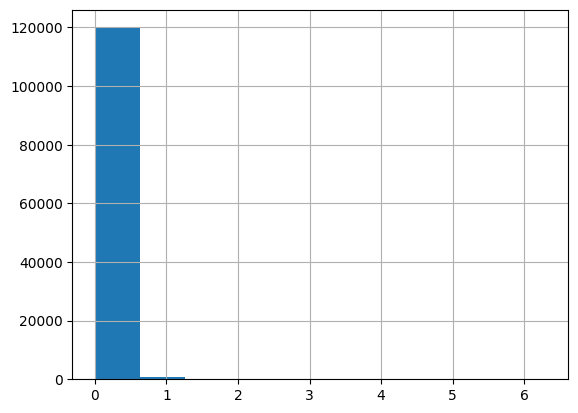

In [ ]:
selected_cdf['j_support'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

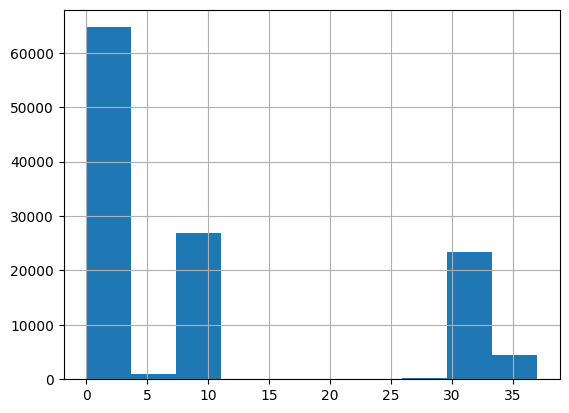

In [ ]:
selected_cdf['d_support'].hist()

In [ ]:
columns = [ 'v_score','d_identity','j_identity','j_support', 'v_support']
#categorical = ['vprimer']
groupby = 'pass_fall'
nonnormal = [ 'v_score','d_identity','j_identity','j_support', 'v_support']
labels={'pass_fail': 'Passing VHHs'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mytable = TableOne(cdf,
                   columns=columns,
                   categorical = [],
                   groupby='pass_fail',
                   nonnormal=nonnormal,
                   rename=labels,
                   pval=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

In [ ]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index                  int64
sequence_id           object
sequence              object
rev_comp              object
productive            object
                      ...   
difference           float64
d_seq_difference     float64
d_germ_difference    float64
j_seq_difference     float64
j_germ_difference    float64
Length: 63, dtype: object

In [ ]:
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒════════════════════════════╤════╤═══════════╤═════════════════════╤═════════════════════╤═════════════════════╤═══════════╕
│                            │    │ Missing   │ Overall             │ 0                   │ 1                   │ P-Value   │
╞════════════════════════════╪════╪═══════════╪═════════════════════╪═════════════════════╪═════════════════════╪═══════════╡
│ n                          │    │           │ 120913              │ 20956               │ 99957               │           │
├────────────────────────────┼────┼───────────┼─────────────────────┼─────────────────────┼─────────────────────┼───────────┤
│ v_score, median [Q1,Q3]    │    │ 0         │ 316.0 [285.0,344.0] │ 315.0 [277.0,346.0] │ 316.0 [286.0,344.0] │ <0.001    │
├────────────────────────────┼────┼───────────┼─────────────────────┼─────────────────────┼─────────────────────┼───────────┤
│ d_identity, median [Q1,Q3] │    │ 0         │ 1.0 [0.9,1.0]       │ 1.0 [1.0,1.0]       │ 1.0 [0.9,1.0]       │ <0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,...,cdr3,duplicate_count,cprimer,vprimer,pass_fail,seq_length,seq_align_length,fwr2_length,cdr1_length,difference
0,0,M02058:623:000000000-DMLF3:1:1101:14011:1987,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGTGGAGTCGGGCGGG...,T,F,IGHV3S53*01,NaN,IGHJ4*01,..................................TGGTGGAGTCGG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,AACGCGGCGAGGAAAATCGCGAGGAAAGACAAC,1,VHH-VecF1,short_hinge,1,341,370,51.0,36.0,NaN
1,1,M02058:623:000000000-DMLF3:1:1101:16430:2047,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGCGGAGTCGGGGGGA...,T,T,IGHV3S53*01,IGHD5*01,IGHJ4*01,CAGTTGCAGCTGGCGGAGTCGGGGGGA...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,AATAGTTGGGGGAAGGCCGCACAAACTGGGACTATAAAAAGTAAT,1,VHH-VecF1,short_hinge,1,382,390,51.0,36.0,6.0
2,2,M02058:623:000000000-DMLF3:1:1101:18699:2020,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGTGGAGTCTGGAGGT...,T,F,IGHV3S53*01,IGHD1*01,IGHJ4*01,CAGTTGCAGCTGGTGGAGTCTGGAGGT...GGCGTGGTGCAGCCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,GTAACCTTATTAAAGGACAAC,1,VHH-VecF1,short_hinge,1,358,363,51.0,36.0,5.0
3,3,M02058:623:000000000-DMLF3:1:1101:16330:2013,CGGCCCGGGAGCGGCCGCTCAGGTGCAGCTGGTGGAGACCGGCGGA...,T,T,IGHV3S53*01,NaN,"IGHJ4*01,IGHJ6*01",CAGGTGCAGCTGGTGGAGACCGGCGGA...GGCTTCGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,AAAGCAAAACACGAAAGGACCGACAAAGAAAAC,1,VHH-VecF1,short_hinge,1,373,370,51.0,36.0,NaN
4,4,M02058:623:000000000-DMLF3:1:1101:13687:2019,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGCGGAGTCAGGCGGA...,T,T,IGHV3S53*01,IGHD8*01,"IGHJ4*01,IGHJ6*01",CAGTTGCAGCTGGCGGAGTCAGGCGGA...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,TCCAACGGGAGCGAGAGTAAGAGGAAC,1,VHH-VecF1,short_hinge,1,364,370,51.0,36.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120908,20951,M02058:623:000000000-DMLF3:1:1102:13824:28612,CGGCCCGGGAGCGGCCGCTCAGGTGCAGCTCGCGGAGTCTGGAGGA...,T,F,IGHV3S58*01,IGHD2*01,IGHJ7*01,CAGGTGCAGCTCGCGGAGTCTGGAGGA...GGCTTGGTGCAGCCTG...,CAGGTGCAGCTGGTAGAGTCTGGGGGA...GGATTGGTGCAGGCTG...,...,NaN,1,VHH-VecF1,short_hinge,0,385,390,51.0,36.0,10.0
120909,20952,M02058:623:000000000-DMLF3:1:1102:18450:28631,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGTGGAGTCTGGAGGC...,T,T,IGHV3S53*01,IGHD7*01,"IGHJ4*01,IGHJ6*01",CAGTTGCAGCTGGTGGAGTCTGG---A...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,NaN,1,VHH-VecF1,short_hinge,0,349,359,51.0,36.0,6.0
120910,20953,M02058:623:000000000-DMLF3:1:1102:11762:28646,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTCGCGGAGACTGGGGGG...,T,F,IGHV3S53*01,IGHD7*01,"IGHJ4*01,IGHJ6*01",CAGTTGCAGCTCGCGGAGACTGGGGGA...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,NaN,1,VHH-VecF1,short_hinge,0,353,359,51.0,36.0,5.0
120911,20954,M02058:623:000000000-DMLF3:1:1102:14792:28685,CGGCCCGGGAGCGGCCGCTCAGGTGCAGCTGGTGGAGTCTGGTGGA...,T,T,IGHV3S66*01,IGHD6*01,"IGHJ4*01,IGHJ6*01",.AGGTGCAGCTGGTGGAGTCTGGTGGA...GGCTTGGTGCAGACTG...,GAGGTGCAGCTCGTGGAGTCTGGGGGA...GGCTTGGTGCAGGCTG...,...,NaN,1,VHH-VecF1,short_hinge,0,397,398,51.0,36.0,17.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

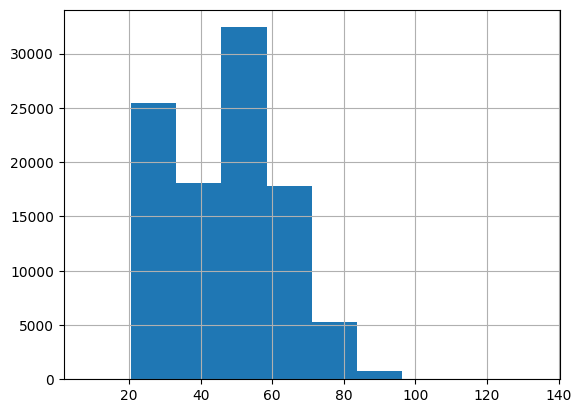

In [ ]:
df['junction_length'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

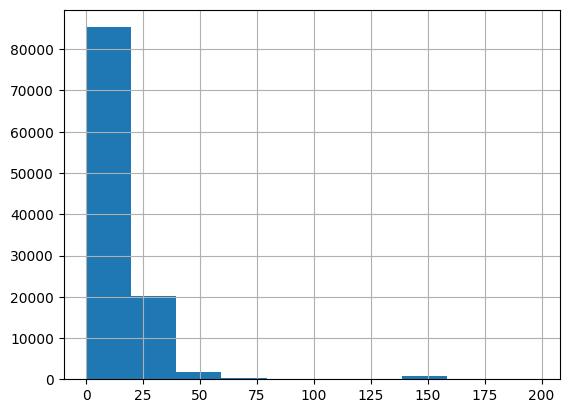

In [ ]:
df['np2_length'].hist()

In [ ]:
columns = [ 'np2_length','np1_length','junction_length', 'd_support', 'd_sequence_start']
#categorical = ['vprimer']
groupby = 'pass_fall'
nonnormal = [ 'np2_length','np1_length', 'junction_length', 'd_support', 'd_sequence_start']
labels={'pass_fail': 'Passing VHHs'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mytable = TableOne(df,
                   columns=columns,
                   categorical = [],
                   groupby='pass_fail',
                   nonnormal=nonnormal,
                   rename=labels,
                   pval=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

In [ ]:
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒══════════════════════════════════╤════╤═══════════╤═════════════════════╤═════════════════════╤═════════════════════╤═══════════╕
│                                  │    │ Missing   │ Overall             │ 0                   │ 1                   │ P-Value   │
╞══════════════════════════════════╪════╪═══════════╪═════════════════════╪═════════════════════╪═════════════════════╪═══════════╡
│ n                                │    │           │ 120913              │ 20956               │ 99957               │           │
├──────────────────────────────────┼────┼───────────┼─────────────────────┼─────────────────────┼─────────────────────┼───────────┤
│ np2_length, median [Q1,Q3]       │    │ 12599     │ 11.0 [6.0,18.0]     │ 10.0 [6.0,20.0]     │ 11.0 [7.0,18.0]     │ <0.001    │
├──────────────────────────────────┼────┼───────────┼─────────────────────┼─────────────────────┼─────────────────────┼───────────┤
│ np1_length, median [Q1,Q3]       │    │ 167       │ 13.0 [8.0,21.0]     │ 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_length(x):
    if isinstance(x, str):
        return len(x)
    elif isinstance(x, float) and np.isnan(x):
        return np.nan
    else:
        return 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

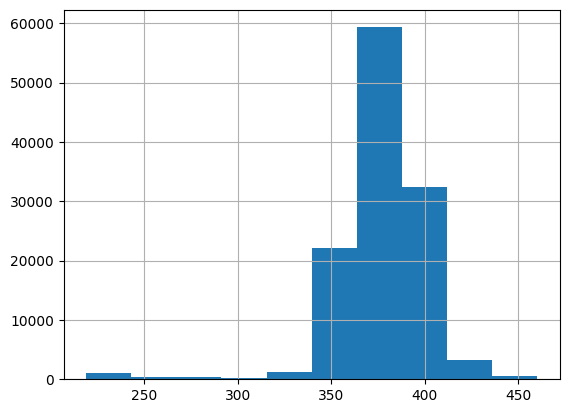

In [ ]:
df['seq_length'] = df['sequence'].apply(lambda x: len(x))
df['seq_align_length'] = df['sequence_alignment'].apply(lambda x: len(x))
df['fwr2_length'] = df['fwr2'].apply(get_length)
df['cdr1_length'] = df['cdr1'].apply(get_length)
df['d_seq_difference'] = df['d_sequence_end'] - df['d_sequence_start']
df['d_germ_difference']  = df['d_germline_end'] -  df['d_germline_start']
df['j_seq_difference'] = df['j_sequence_end'] - df['j_sequence_start']
df['j_germ_difference']  = df['j_germline_end'] -  df['j_germline_start']
df['seq_length'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

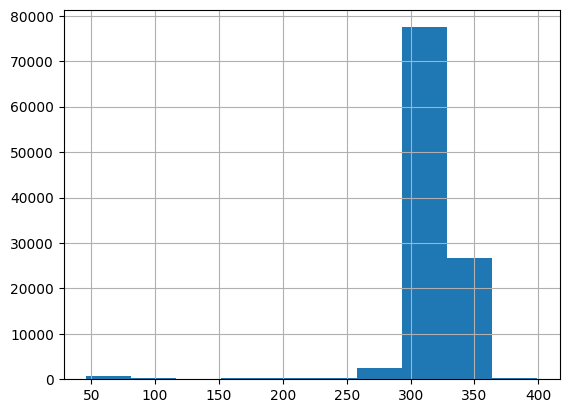

In [ ]:
df['d_sequence_start'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

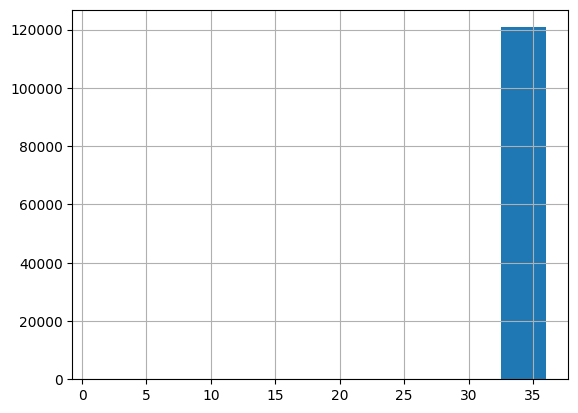

In [ ]:
df['cdr1_length'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

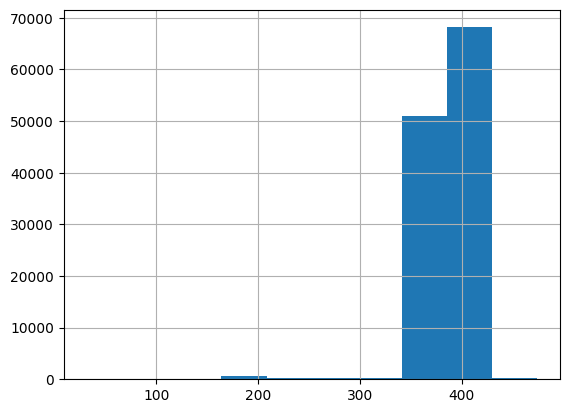

In [ ]:
df['seq_align_length'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

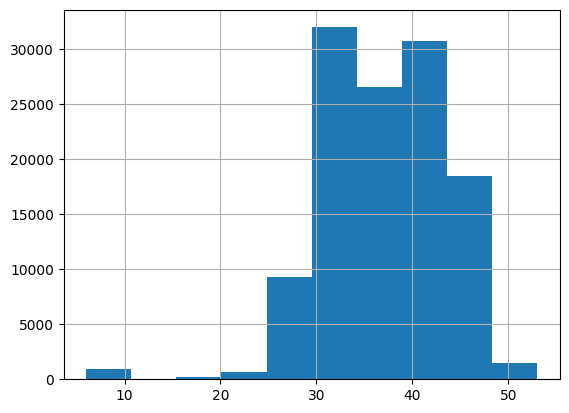

In [ ]:
df['j_seq_difference'].hist()

In [ ]:
columns = [ 'seq_length', 'j_seq_difference', 'd_seq_difference','j_germ_difference', 'd_germ_difference']
#categorical = ['vprimer']
groupby = 'pass_fall'
nonnormal = [ 'seq_length', 'j_seq_difference', 'd_seq_difference','j_germ_difference', 'd_germ_difference']
labels={'pass_fail': 'Passing VHHs'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mytable = TableOne(df,
                   columns=columns,
                   categorical = [],
                   groupby='pass_fail',
                   nonnormal=nonnormal,
                   rename=labels,
                   pval=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

In [ ]:
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒═══════════════════════════════════╤════╤═══════════╤═════════════════════╤═════════════════════╤═════════════════════╤═══════════╕
│                                   │    │ Missing   │ Overall             │ 0                   │ 1                   │ P-Value   │
╞═══════════════════════════════════╪════╪═══════════╪═════════════════════╪═════════════════════╪═════════════════════╪═══════════╡
│ n                                 │    │           │ 120913              │ 20956               │ 99957               │           │
├───────────────────────────────────┼────┼───────────┼─────────────────────┼─────────────────────┼─────────────────────┼───────────┤
│ seq_length, median [Q1,Q3]        │    │ 0         │ 379.0 [364.0,391.0] │ 382.0 [364.0,395.0] │ 379.0 [364.0,389.0] │ <0.001    │
├───────────────────────────────────┼────┼───────────┼─────────────────────┼─────────────────────┼─────────────────────┼───────────┤
│ j_seq_difference, median [Q1,Q3]  │    │ 529       │ 37.0 [32.0,41.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Adjusted Analysis

We draw inspiration from Susan Li's [Building A Logistic Regression in Python, Step by Step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8).

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cols=['np2_length','np1_length','junction_length', 'd_support', 'd_sequence_start']
df = df.dropna(subset=cols)
X=df[cols]
y=df['pass_fail']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,...,fwr2,fwr3,fwr4,cdr1,cdr2,cdr3,duplicate_count,cprimer,vprimer,pass_fail
1,1,M02058:623:000000000-DMLF3:1:1101:16430:2047,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGCGGAGTCGGGGGGA...,T,T,IGHV3S53*01,IGHD5*01,IGHJ4*01,CAGTTGCAGCTGGCGGAGTCGGGGGGA...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,GTGCACTGGTACCGCCAAGCTCCAGGGGAGCAGCGCGAGTCGGTCG...,GACTATGCAGACTCCGTGAAG...GGCCGATTCACCATCTCCTTGG...,TGGGGCCAGGGGACCCAGGTCACCGTCTCCTCA,GGAAGCGCCTTC............AATTTCAATAGC,ATTATGAGTGGT.........GGTACCACA,AATAGTTGGGGGAAGGCCGCACAAACTGGGACTATAAAAAGTAAT,1,VHH-VecF1,short_hinge,1
2,2,M02058:623:000000000-DMLF3:1:1101:18699:2020,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGTGGAGTCTGGAGGT...,T,F,IGHV3S53*01,IGHD1*01,IGHJ4*01,CAGTTGCAGCTGGTGGAGTCTGGAGGT...GGCGTGGTGCAGCCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,ATGGGCTGGTACCGCCAGGCTCCAGGGAAGCAGCGCGAATTGGTCG...,AAGTATGCAGAGTCCGCGAAG...GGCCGGTTCACCATCTCCAGAG...,GGGGGCCAGGGGAAGGACGTCACAGTCTCC,GGGTCCAAATTC............CTAATTTACGAG,ATTCGTGTTAGT.........GGTACTACA,GTAACCTTATTAAAGGACAAC,1,VHH-VecF1,short_hinge,1
4,4,M02058:623:000000000-DMLF3:1:1101:13687:2019,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGCGGAGTCAGGCGGA...,T,T,IGHV3S53*01,IGHD8*01,"IGHJ4*01,IGHJ6*01",CAGTTGCAGCTGGCGGAGTCAGGCGGA...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,ATGGGCTGGTACCGCCAGGCTCCAGGGAAGCAGCGCGAGTTGGTCG...,AACTATTCAGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAG...,GGGGGCCAGGGGACACAGGTCACCGTCTCCT,GGGAGCATCTTC............AGTATCAATGCC,GTTACTACTGGT.........GGTAGCACA,TCCAACGGGAGCGAGAGTAAGAGGAAC,1,VHH-VecF1,short_hinge,1
6,6,M02058:623:000000000-DMLF3:1:1101:16854:2023,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTCGTGGAGACGGGGGGA...,T,T,IGHV3S30*01,"IGHD1*01,IGHD7*01","IGHJ4*01,IGHJ6*01",CAGTTGCAGCTCGTGGAGACGGGGGGA...GCCATGGTGCAGCCTG...,CAGTTGCAGCTCGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,ATGATCTGGGTCCGCCAGGCTCCAGGGAAGGGGCCCGAAGAGGTCG...,CACTATGCAGATTCCGTGAGG...GGCCGATTCACTATCTCCAGAG...,AGGGGCCAGGGGACCCAGGTCACCGACTCCT,GGCTTCCTCTTC............AGTGGTTATGCT,ATTAATACTTAT......GGCAATAATCCA,GCGAGGGGCTTACCTGACCCAAATAACCGCACCAATGAAAAT,1,VHH-VecF1,short_hinge,1
8,8,M02058:623:000000000-DMLF3:1:1101:16562:2038,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTCGCGGAGTCTGGGGGC...,T,F,IGHV3S41*01,IGHD3*01,IGHJ4*01,CAGTTGCAGCTCGCGGAGTCTGGGGG-...--CTTGGCGGAGCCTG...,CAGTTGCAGCTCGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,ATGACCTGGGTCCGCCAGGCTCCAGGAAAGGGGCTCGAGTGGGTCT...,GCGTATACAGACTCCGTGAAG...GGTAGATTCATCATCTCCAAAG...,TGGGGCCAGGGGACCCAGGTCACCGTCGCCT,GGTTTCACCTTC............GCTAACTATCCC,ATCAATACTTAT......GGTGATGTGACA,GCGAAAGATGAGGAGTTTACTGATCACAGAGGAGCGTAGAACGCAG...,1,VHH-VecF1,short_hinge,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120908,20951,M02058:623:000000000-DMLF3:1:1102:13824:28612,CGGCCCGGGAGCGGCCGCTCAGGTGCAGCTCGCGGAGTCTGGAGGA...,T,F,IGHV3S58*01,IGHD2*01,IGHJ7*01,CAGGTGCAGCTCGCGGAGTCTGGAGGA...GGCTTGGTGCAGCCTG...,CAGGTGCAGCTGGTAGAGTCTGGGGGA...GGATTGGTGCAGGCTG...,...,ATGGGCTGGTTCCGCCAGGCTCCAGGGAAGGAGCGTGAGTTTGTCG...,TCATACTCAGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAG...,NaN,GGACGCACCTTC............ACCGGCTATGAC,ATTAGCTGGTAT......AGTACCACGCGT,NaN,1,VHH-VecF1,short_hinge,0
120909,20952,M02058:623:000000000-DMLF3:1:1102:18450:28631,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTGGTGGAGTCTGGAGGC...,T,T,IGHV3S53*01,IGHD7*01,"IGHJ4*01,IGHJ6*01",CAGTTGCAGCTGGTGGAGTCTGG---A...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,ATGGCATGGTACCGCCAGGCTCCAGGGAAGCAGCGCGAGTTCGTCG...,AAGTATGTAAGCTCCGTGAAG...GGCCGATTCACCATCACCAGAG...,NaN,GGAATCGTCTTC............AGGATCTATGAC,AGTCGTAGCGAT.........GGTGTTACA,NaN,1,VHH-VecF1,short_hinge,0
120910,20953,M02058:623:000000000-DMLF3:1:1102:11762:28646,CGGCCCGGGAGCGGCCGCTCAGTTGCAGCTCGCGGAGACTGGGGGG...,T,F,IGHV3S53*01,IGHD7*01,"IGHJ4*01,IGHJ6*01",CAGTTGCAGCTCGCGGAGACTGGGGGA...GGCTTGGTGCAGGCTG...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTGCAGCCTG...,...,ATGGCATGGTACCGCCAGGCTCCA

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Optimization terminated successfully.
         Current function value: 0.001781
         Iterations 13
                         Results: Logit
Model:               Logit            Method:           MLE     
Dependent Variable:  pass_fail        Pseudo R-squared: 0.028   
Date:                2024-02-27 18:49 AIC:              326.0236
No. Observations:    88720            BIC:              372.9898
Df Model:            4                Log-Likelihood:   -158.01 
Df Residuals:        88715            LL-Null:          -162.52 
Converged:           1.0000           LLR p-value:      0.060748
No. Iterations:      13.0000          Scale:            1.0000  
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
np2_length       -0.0403   0.0200 -2.0200 0.0434 -0.0795 -0.0012
np1_length       -0.0551   0.0242 -2.2785 0.0227 -0.1025 -0.0077
junction_len

In [ ]:
cols = [ 'seq_length', 'j_seq_difference', 'd_seq_difference','j_germ_difference', 'd_germ_difference']
df = df.dropna(subset=cols)
X=df[cols]
y=df['pass_fail']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.004849
         Iterations: 35
                              Results: Logit
Model:                  Logit                Method:               MLE    
Dependent Variable:     pass_fail            Pseudo R-squared:     0.178  
Date:                   2024-02-27 18:59     AIC:                  23.5489
No. Observations:       1397                 BIC:                  49.7593
Df Model:               4                    Log-Likelihood:       -6.7744
Df Residuals:           1392                 LL-Null:              -8.2417
Converged:              0.0000               LLR p-value:          0.56884
No. Iterations:         35.0000              Scale:                1.0000 
--------------------------------------------------------------------------
                   Coef.   Std.Err.     z    P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------
seq_length        -0.0313     0.0378 -0.8278 0.4078     -0.1053 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Check Duplicates only

In [ ]:
df = df[df.duplicate_count > 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1397, 63)

In [ ]:
df.pass_fail.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    1396
0       1
Name: pass_fail, dtype: int64